In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
## Load the transaction sheet from the excel data
transaction = pd.read_excel('Raw_data.xlsx',sheet_name='Transactions')

In [141]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [142]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

The **product_first_sold_date** column is not in datetime format, so need to change from float64 to datetime format

## Total Records

In [143]:
print("Total Records(rows) in the dataset : {}".format(transaction.shape[0]))
print("Total Columns(features) in the dataset : {}".format(transaction.shape[1]))

Total Records(rows) in the dataset : 20000
Total Columns(features) in the dataset : 13


In [144]:
df_numeric = transaction.select_dtypes(include=[np.number])
df_numeric = df_numeric.columns.values

df_categorical = transaction.select_dtypes(exclude=[np.number])
df_categorical = df_categorical.columns.values

In [145]:
print("The numerical features are: \n{}".format(df_numeric))
print("The categorical features are: \n{}".format(df_categorical))

The numerical features are: 
['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost' 'product_first_sold_date']
The categorical features are: 
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size']


### 1.  Check Missing Values
Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [146]:
transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [147]:
transaction.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

Here it is observed that columns like ***online_order, brand, product_line, product_class , product_size, standard_cost, product_first_sold_date*** have missing values.

### 1.1 Online Order
- Since 1.8 % of the records have online_order data missing we can perform mode imputation for this categorical column.

In [148]:
transaction[transaction['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [149]:
transaction['online_order'].mode()

0    1.0
Name: online_order, dtype: float64

In [150]:
transaction['online_order'].fillna(1,inplace=True)

In [151]:
transaction['online_order'].isnull().sum()

0

Now no missing value in ***online_order***

### 1.2 Brand, Product Line, Product Class, Product Size, Standard Cost, Product First Sold Date

In [152]:
transaction[transaction['brand'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


It is observed that when brand is null then all other column values with missing valuesl iike 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date' are also null. ***Also this null values comprise 1 % of the dataset. Hence we can drop these records/rows.***

In [153]:
transaction[transaction['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].drop_duplicates()

,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
136,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
transaction[transaction['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].shape[0]

197

In [155]:
row_to_drop = transaction[transaction['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].index
row_to_drop

Int64Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,
             1282,
            ...
            19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859,
            19871],
           dtype='int64', length=197)

In [156]:
transaction.drop(index=row_to_drop,inplace=True,axis=0)

In [157]:
transaction.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

### Now, there is no missing value in the dataset

In [158]:
print('Total record after removing missing value: {}'.format(transaction.shape[0]))

Total record after removing missing value: 19803


In [159]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


### 2. Creating a new feature "Profit"


-The Profit column will be the difference between the list price and the standard price of a product.

In [160]:
transaction['profit'] = transaction['list_price'] - transaction['standard_cost']

In [161]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


<Figure size 1440x576 with 0 Axes>

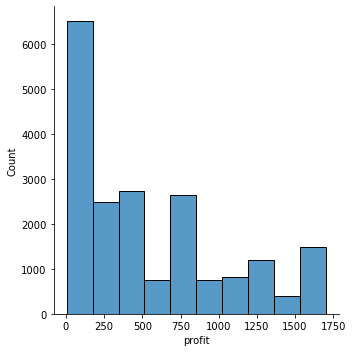

In [162]:
# Dystribution of the Profit Column

plt.figure(figsize=(20,8))
sns.displot(transaction['profit'],bins=10)

### 3. Inconsistency Check in Data


We will check whether there is inconsistent data / typo error data is present in the categorical columns.

##### The columns to be checked are 'online_order', 'order_status' ,'product_line', 'product_class' , 'product_class' and 'brand'

### 3.1 Online Order
There is no inconsistent data in online_order column.

In [165]:
transaction['online_order'].value_counts()

1.0    10097
0.0     9706
Name: online_order, dtype: int64

### 3.2 Order Status
There is no inconsistent data in order_status column.

In [169]:
transaction['order_status'].value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

In [174]:
transaction[['order_status','online_order']].drop_duplicates()

,order_status,online_order
0,Approved,0.0
1,Approved,1.0
42,Cancelled,0.0
254,Cancelled,1.0


### 3.3 Product Line
There is no inconsistent data in product_line column.

In [176]:
transaction['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

### 3.4 Product Class
There is no inconsistent data in product_class column.

In [178]:
transaction['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

### 3.5 Product Size
There is no inconsistent data in product_size column.

In [180]:
transaction['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

### 3.6 Brand
There is no inconsistent data in brand column.

In [181]:
transaction['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

### 4. Duplication Checks
We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [189]:
trans_dep = transaction.drop('transaction_id',axis=1).drop_duplicates()

print("Number of records after removing transaction_id (pk), duplicates : {}".format(trans_dep.shape[0]))
print("Number of records in original dataset : {}".format(transaction.shape[0]))

Number of records after removing transaction_id (pk), duplicates : 19803
Number of records in original dataset : 19803


Since both the numbers are same. There are no duplicate records in the dataset

### 5. Exporting the Cleaned Transactions Data Set to csv
Currently the Transactions dataset is clean. Hence we can export the data to a csv to continue our data analysis of Customer Segments by joining it to other tables.

In [190]:
transaction.to_csv('Trans_cleaned.csv',index=False)